![](https://img.huffingtonpost.com/asset/5cdec4402400006f077f0af6.jpeg?ops=800_450)

# Guide to Fraud Detection

## Business Problem
It is vital that credit card companies are able to identify fraudulent credit card transactions so that customers are not charged for items that they did not purchase. Such problems can be tackled with Data Science and its importance, along with Machine Learning, cannot be overstated. This project intends to illustrate the modelling of a data set using machine learning with Credit Card Fraud Detection.

## Notebook Description
This notebook is fully written in Python 3.0 version. For each code chunk appropriate description is given. Although it is expected that the reader has a preliminary experience with Python. Regarding the methodologies used in this notebook, we always tried to provide a concise theoretical background.
Now we are good to go. Let's start...

## Introduction
In this kernel we will explore & implement the scope of credit card fraud detection using predictive models to identify the level of accuracy of labelling a transaction as regular or fraud. (In the dataset we're using scaled features due to privacy reasons)

## Scope
1. <a href='#1'> Exploratory Data Analysis </a>
2. <a href='#2'> Understanding Imbalance Data </a>
3. <a href='#3'> Resampling Approach </a>
4. <a href='#4'> Outlier Detection </a>
5. <a href='#5'> Model Prediction </a>
6. <a href='#6'> Result Evaluation </a>


## Focus Points
* Never implement testing directly on oversampled and undersampled data.
* Resampling (Oversampling or Undersampling) should be done during cross-validation only.
* Always implement evaluation metrics like F1 score, Confusion Matrix, AUC score over Accuracy.


## <a id='1'> Exploratory Data Analysis </a>

In [1]:
!pip install urllib3

In [2]:
# Import the necessary packages used in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import gridspec
from sklearn.decomposition import PCA, TruncatedSVD

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import plotly
init_notebook_mode(connected=True) #do not miss this line

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score,precision_recall_curve,average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

from zipfile import ZipFile
import urllib.request
from io import BytesIO

In [3]:
folder = urllib.request.urlopen('https://s3.amazonaws.com/hackerday.datascience/68/creditcard.csv.zip')
zipfile = ZipFile(BytesIO(folder.read()))
zipfile.namelist()

['creditcard.csv']

### Read the dataset and save to variable 'datafr'

In [4]:
datafr = pd.read_csv(zipfile.open("creditcard.csv"))
pd.concat([datafr.head(),datafr.tail()])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Displaying the structure of dataset

In [5]:
display(datafr.shape)

(284807, 31)

In [6]:
display(datafr.head(10))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
display(datafr.tail(10))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Variable Description
Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. <br><br> Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. <br><br> The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The data is provided for 2 days transaction. For some instances we have half-second transaction data. Since 172792 seconds approxs to (60x60x24) which equals to 2 days

In [8]:
print("Average Amount in a Fraudulent Transaction: " + str(datafr[datafr["Class"] == 1]["Amount"].mean()))
print("Average Amount in a Valid Transaction: " + str(datafr[datafr["Class"] == 0]["Amount"].mean()))

Average Amount in a Fraudulent Transaction: 122.21132113821139
Average Amount in a Valid Transaction: 88.29102242231328


**Comments:** As we can clearly notice from this, the average Money transaction for the fraudulent ones are more. This makes this problem crucial to deal with. Now let us try to understand the distribution of values in each of the features. Let's start with the Amount.

### Feature Engineering

In [9]:
hours = (datafr['Time']/3600).astype(int)
datafr['Hours'] = hours

days = (datafr['Time']/86400).astype(int)
datafr['Days'] = days

### Create a new binned column based on Amount

In [10]:
bins = [0,100,1000,5000,10000,20000, 30000]
labels = [1,2,3,4,5,6]
datafr['binned'] = pd.cut(datafr['Amount'], bins=bins, labels=labels)
datafr.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Hours,Days,binned
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0,2
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0,2
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0,2
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0,1
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,0,0,1
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,0,0,1
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,0,0,1
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0,0,0,1
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0,0,0,1


C:\Users\chauhan\AppData\Local\Temp\ipykernel_68224\4209980528.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\chauhan\Anaconda3\lib\site-packages\seaborn\distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\chauhan\AppData\Local\Temp\ipykernel_68224\4209980528.py:14: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for 

C:\Users\chauhan\AppData\Local\Temp\ipykernel_68224\4209980528.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\chauhan\Anaconda3\lib\site-packages\seaborn\distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\chauhan\AppData\Local\Temp\ipykernel_68224\4209980528.py:14: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for 

C:\Users\chauhan\AppData\Local\Temp\ipykernel_68224\4209980528.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\chauhan\Anaconda3\lib\site-packages\seaborn\distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\chauhan\AppData\Local\Temp\ipykernel_68224\4209980528.py:14: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for 

C:\Users\chauhan\AppData\Local\Temp\ipykernel_68224\4209980528.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\chauhan\Anaconda3\lib\site-packages\seaborn\distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\chauhan\AppData\Local\Temp\ipykernel_68224\4209980528.py:14: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for 

C:\Users\chauhan\AppData\Local\Temp\ipykernel_68224\4209980528.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\chauhan\Anaconda3\lib\site-packages\seaborn\distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\chauhan\AppData\Local\Temp\ipykernel_68224\4209980528.py:14: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for 

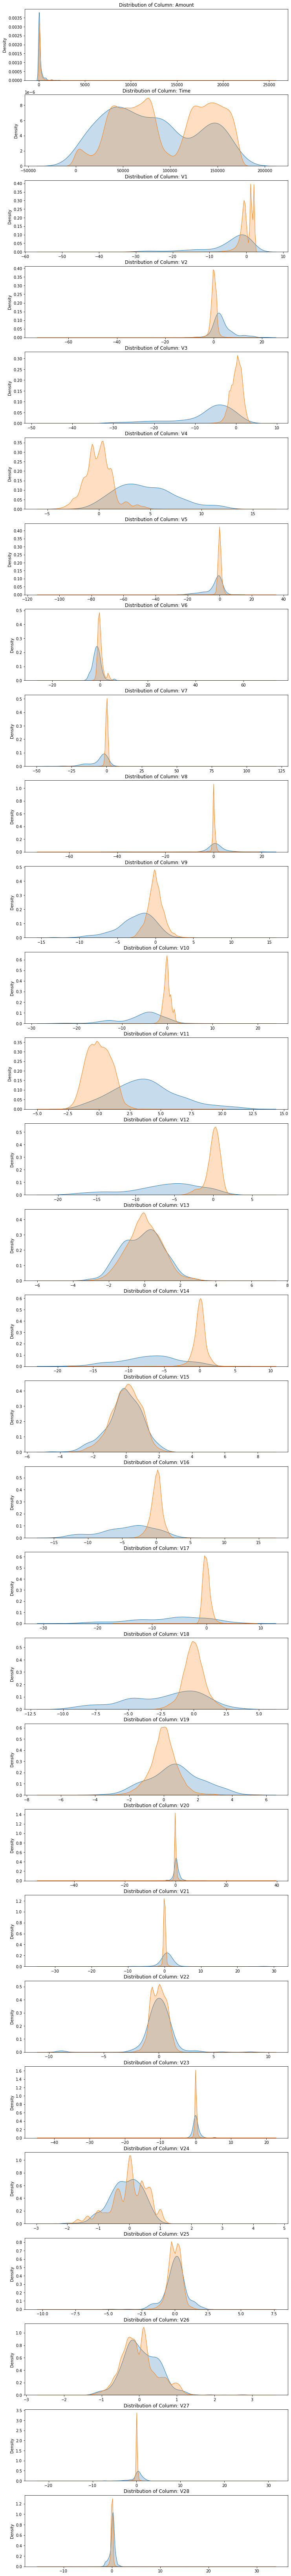

In [11]:
# Reorder the columns Amount, Time then the rest
data_plot = datafr.copy()
amount = data_plot['Amount']
data_plot.drop(labels=['Amount'], axis=1, inplace = True)
data_plot.insert(0, 'Amount', amount)

# Plot the distributions of the features
columns = data_plot.iloc[:,0:30].columns
plt.figure(figsize=(12,30*4))
grids = gridspec.GridSpec(30, 1)
for grid, index in enumerate(data_plot[columns]):
    ax = plt.subplot(grids[grid])
    sns.distplot(data_plot[index][data_plot.Class == 1], hist=False, kde_kws={"shade": True}, bins=50)
    sns.distplot(data_plot[index][data_plot.Class == 0], hist=False, kde_kws={"shade": True}, bins=50)
    ax.set_xlabel("")
    ax.set_title("Distribution of Column: "  + str(index))
plt.show()


Text(0.5, 1.0, 'BoxPlot for Class 1: Fraudulent')

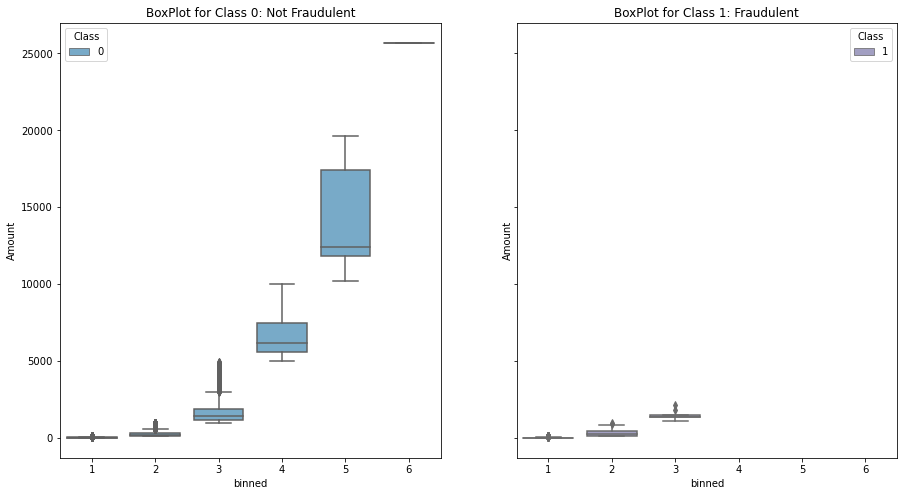

In [12]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 8))
sns.boxplot(x="binned", y="Amount", hue="Class", data=datafr[datafr['Class']==0], palette='Blues', ax=axes[0])
axes[0].set_title('BoxPlot for {}'.format("Class 0: Not Fraudulent"))
sns.boxplot(x="binned", y="Amount", hue="Class", data=datafr[datafr['Class']==1], palette='Purples', ax=axes[1])
axes[1].set_title('BoxPlot for {}'.format("Class 1: Fraudulent"))

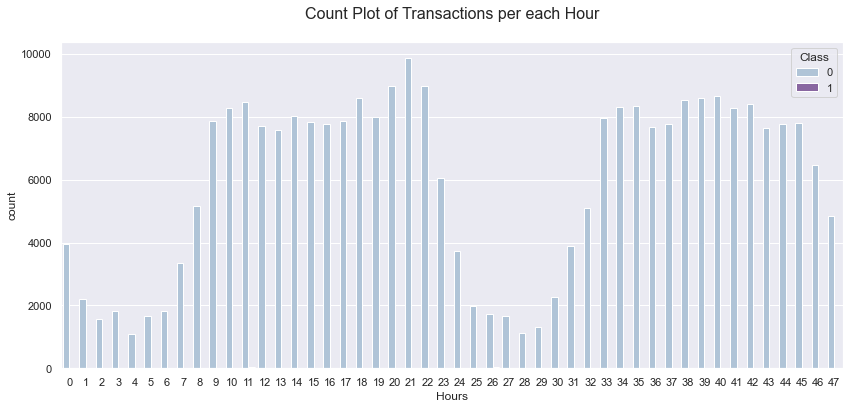

In [13]:
plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
sns.countplot(x='Hours',data = datafr, hue = 'Class',palette='BuPu')
plt.title("Count Plot of Transactions per each Hour\n", fontsize=16)
sns.set_context("paper", font_scale=1.4)
plt.show()

In [14]:
print("Fraudulent Transactions:", len(datafr[datafr['Class']==1]))
print("Usual Transactions:", len(datafr[datafr['Class']==0]))

Fraudulent Transactions: 492
Usual Transactions: 284315


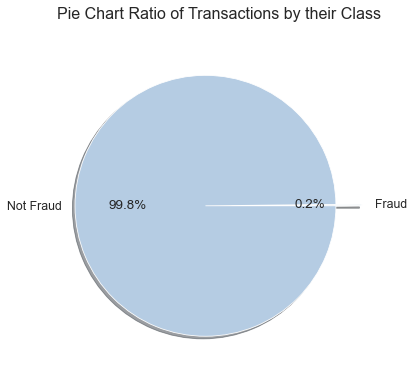

In [15]:
fraud =len(datafr[datafr['Class']==1])
notfraud = len(datafr[datafr['Class']==0])

# Data to plot
labels = 'Fraud','Not Fraud'
sizes = [fraud,notfraud]

# Plot
plt.figure(figsize=(7,6))
plt.pie(sizes, explode=(0.1, 0.1), labels=labels, colors=sns.color_palette("BuPu"),
autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Pie Chart Ratio of Transactions by their Class\n', fontsize=16)
sns.set_context("paper", font_scale=1.2)

**The dataset is highly imbalanced which could lead us to create an algorithm resulting in predicting only 1 type of class. Thus, we have to try different strategies as a solution to imbalance class problem.**
Here are the few techniques that can be used for such a problem:
1. Try Changing Performance Metric
2. Try Resampling Dataset
3. Try Generating Synthetic Samples
4. Try Different Algorithms

[Reference 1](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)
<br>
[Reference 2](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18)

In [16]:
datafr.isnull().shape[0]
print("Number of cases with non-missing values: " + str(datafr.isnull().shape[0]))
print("Number of cases with missing values: " + str(datafr.shape[0] - datafr.isnull().shape[0]))

Number of cases with non-missing values: 284807
Number of cases with missing values: 0


**Comments:** As there are no missing data, we turn to standardization. We standardize only Time and Amount using RobustScaler.

In [17]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(datafr[["Time", "Amount"]])
datafr[["Time", "Amount"]] = scaler.transform(datafr[["Time", "Amount"]])

pd.concat([datafr.head(),datafr.tail()])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Hours,Days,binned
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0,0,0,2
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0,0,0,1
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0,0,0,2
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0,0,0,2
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0,0,0,1
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0,47,1,1
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0,47,1,1
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0,47,1,1
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0,47,1,1
284806,1.035022,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.008797,-0.473649,-0.818267,-0.002415,0.013649,2.724796,0,47,1,2


## <a id='2'> Understanding Imbalance Data </a>
### The metric trap
One of the major issues that novice users fall into when dealing with unbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.


In [18]:
y = datafr['Class']
X = datafr.drop(['Time','Class', 'binned'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=333)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy is {:.2f}%".format(accuracy * 100.0))

Test Accuracy is 99.95%


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


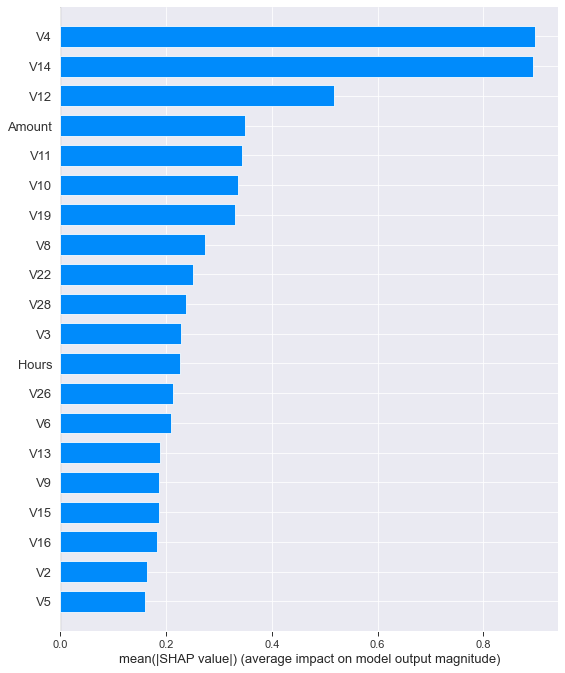

In [19]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

**Again trying to run a predictive model on first 3 features "V1", "V2", "V3" we should notice a change in model's performance**

In [20]:
model = XGBClassifier()
model.fit(X_train[['V1','V2','V3']], y_train)

y_pred = model.predict(X_test[['V1','V2','V3']])
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy is {:.2f}%".format(accuracy * 100.0))

Test Accuracy is 99.86%


The model accuracy hasn't differed by much suggesting that the achieved acccuracy is just an illusion which is caused due to imbalanced class dataset. Below we can actually see how the proportion of observations are actually predicted for each class using Confusion Matrix.

### Confusion matrix

An interesting way to evaluate the results is by means of a confusion matrix, which shows the correct and incorrect predictions for each class. In the first row, the first column indicates how many classes 0 were predicted correctly, and the second column, how many classes 0 were predicted as 1. In the second row, we note that all class 1 entries were erroneously predicted as class 0.

Therefore, the higher the diagonal values of the confusion matrix the better, indicating many correct predictions.



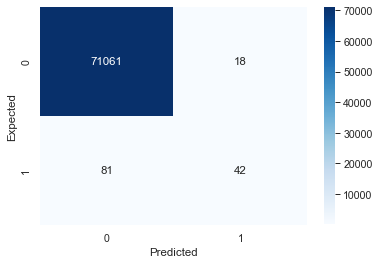

In [21]:
# assign cnf_matrix with result of confusion_matrix array
cnf_matrix = confusion_matrix(y_test,y_pred)
#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Change the Performance Metric
As we saw above, accuracy is not the best metric to use when evaluating imbalanced datasets as it can be very misleading. Metrics that can provide better insight include:
* Confusion Matrix: a table showing correct predictions and types of incorrect predictions.
* Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
* Recall: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
* F1: Score: the weighted average of precision and recall.

## <a id='3'> Resampling Approach </a>
A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).
![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

**Note: Always split the dataset into test and train sets BEFORE trying any resampling techniques!**

The steps are as follows (The whole set-up will be structured using the imbalance-learn module): 
* Use a 5-fold cross validation on the training set
* On each of the folds use undersampling 
* Fit the model on the training folds and validate on the validation fold

In [22]:
# Create the cross validation framework 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

# Import the imbalance Learn module
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


kf = StratifiedKFold(n_splits=3, random_state = 333, shuffle = True)


### Undersampling - Logistic Regression

In [23]:
# Logistic Regression 
imba_pipeline = make_pipeline(NearMiss(), 
                              LogisticRegression())

log_reg_params = {"penalty": ['l1', 'l2'], 
                  'C': [ 0.01, 0.1, 1, 100], 
                  'solver' : ['liblinear']}

new_params = {'logisticregression__' + key: log_reg_params[key] for key in log_reg_params}
#grid_imba_log_reg = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
#                        return_train_score=True)


grid_imba_log_reg = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, 
                                  return_train_score=True)

grid_imba_log_reg.fit(X_train, y_train);
#logistic_cv_score_us = cross_val_score(grid_imba_log_reg, X_train, y_train, scoring = 'recall', cv = kf)
logistic_cv_score_us = cross_val_score(grid_imba_log_reg, X_train, y_train, scoring = 'recall', cv = kf)


y_test_predict = grid_imba_log_reg.best_estimator_.named_steps['logisticregression'].predict(X_test)
logistic_recall_us = recall_score(y_test, y_test_predict)
logistic_accuracy_us = accuracy_score(y_test, y_test_predict)
logistic_f1_us = f1_score(y_test, y_test_predict)
logistic_precision_us = average_precision_score(y_test, y_test_predict)

# print("Cross Validation Score for Logistic Regression: " + str(ulogistic_cv_score.mean()))
# print("Recall Score for Logistic Regression: " + str(ulogistic_recall))
log_reg_us = grid_imba_log_reg.best_estimator_

Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.


In [24]:
log_reg_us, logistic_cv_score_us, logistic_f1_us, logistic_precision_us, logistic_accuracy_us, logistic_recall_us

(Pipeline(steps=[('nearmiss', NearMiss()),
                 ('logisticregression',
                  LogisticRegression(C=0.01, penalty='l1', solver='liblinear'))]),
 array([0.87804878, 0.87804878, 0.79674797]),
 0.017266187050359712,
 0.007866215853499971,
 0.8273363107777871,
 0.8780487804878049)

In [25]:
# Cumulatively create a table for the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

result_list = []
yproba = grid_imba_log_reg.best_estimator_.named_steps['logisticregression'].predict_proba(X_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test, yproba)
auc = roc_auc_score(y_test, yproba)

new_entry = {'classifiers': "Logistic Regression", 'fpr': fpr, 'tpr': tpr, 'auc': auc}
result_list.append(new_entry)

# Create DataFrame outside the loop
result_table = pd.DataFrame(result_list, columns=['classifiers', 'fpr', 'tpr', 'auc'])

result_table

,classifiers,fpr,tpr,auc
0,Logistic Regression,"[0.0, 1.4068852966417647e-05, 0.00012661967669...","[0.0, 0.0, 0.0, 0.008130081300813009, 0.008130...",0.925266


In [26]:
# Define the pipeline
imba_pipeline = make_pipeline(NearMiss(), 
                              RandomForestClassifier())
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

new_params = {'randomforestclassifier__' + key: params[key] for key in params}
#grid_imba_rf = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
#                        return_train_score=True)
grid_imba_rf = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf,
                        return_train_score=True)

grid_imba_rf.fit(X_train, y_train);

rfc_cv_score_us = cross_val_score(grid_imba_rf, X_train, y_train, scoring='recall', cv=kf)

y_test_predict = grid_imba_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)
rfc_recall_us = recall_score(y_test, y_test_predict)
rfc_accuracy_us = accuracy_score(y_test, y_test_predict)
rfc_f1_us = f1_score(y_test, y_test_predict)
rfc_precision_us = average_precision_score(y_test, y_test_predict)

# print("Cross Validation Score for Random Forest: " + str(urfc_cv_score.mean()))
# print("Recall Score for Random Forest: " + str(urfc_recall))
rfc = grid_imba_rf.best_estimator_

In [27]:

# Cumulatively create a table for the ROC curve
yproba = grid_imba_rf.best_estimator_.named_steps['randomforestclassifier'].predict_proba(X_test)[::,1]
    
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)

new_entry = {'classifiers': "Random Forest",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}
result_list.append(new_entry)

# Create DataFrame outside the loop
result_table = pd.DataFrame(result_list, columns=['classifiers', 'fpr', 'tpr', 'auc'])

result_table

,classifiers,fpr,tpr,auc
0,Logistic Regression,"[0.0, 1.4068852966417647e-05, 0.00012661967669...","[0.0, 0.0, 0.0, 0.008130081300813009, 0.008130...",0.925266
1,Random Forest,"[0.0, 0.0, 7.034426483208824e-05, 7.0344264832...","[0.0, 0.024390243902439025, 0.4390243902439024...",0.939654


In [28]:
# Define the pipeline
imba_pipeline = make_pipeline(NearMiss(), 
                              SVC(probability = True))
svc_params = {'C': [0.5, 0.7, 0.9, 1], 
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

new_params = {'svc__' + key: svc_params[key] for key in svc_params}
#grid_imba_svc = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
#                        return_train_score=True)
grid_imba_svc = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf,
                        return_train_score=True)

grid_imba_svc.fit(X_train, y_train);

svc_cv_score_us = cross_val_score(grid_imba_svc, X_train, y_train, scoring='recall', cv=kf) 

y_test_predict = grid_imba_svc.best_estimator_.named_steps['svc'].predict(X_test)
svc_recall_us = recall_score(y_test, y_test_predict)
svc_accuracy_us = accuracy_score(y_test, y_test_predict)
svc_f1_us = f1_score(y_test, y_test_predict)
svc_precision_us = average_precision_score(y_test, y_test_predict)

# print("Cross Validation Score for Support Vector Classifier: " + str(usvc_cv_score.mean()))
# print("Recall Score for Support Vector Classifier: " + str(usvc_recall))
svc = grid_imba_svc.best_estimator_

In [29]:
# Cumulatively create a table for the ROC curve

yproba = grid_imba_svc.best_estimator_.named_steps['svc'].predict_proba(X_test)[::,1]
    
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)

new_entry = {'classifiers': "Support Vector Classifier",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}
result_list.append(new_entry)

# Create DataFrame outside the loop
result_table = pd.DataFrame(result_list, columns=['classifiers', 'fpr', 'tpr', 'auc'])

result_table

,classifiers,fpr,tpr,auc
0,Logistic Regression,"[0.0, 1.4068852966417647e-05, 0.00012661967669...","[0.0, 0.0, 0.0, 0.008130081300813009, 0.008130...",0.925266
1,Random Forest,"[0.0, 0.0, 7.034426483208824e-05, 7.0344264832...","[0.0, 0.024390243902439025, 0.4390243902439024...",0.939654
2,Support Vector Classifier,"[0.0, 0.0, 0.0, 1.4068852966417647e-05, 1.4068...","[0.0, 0.008130081300813009, 0.0487804878048780...",0.788760


In [30]:
# Gather the scores
data_score = [['Logistic Regression', logistic_cv_score_us.mean(), logistic_accuracy_us, logistic_recall_us, logistic_f1_us, logistic_precision_us ], 
        ['Random Forest', rfc_cv_score_us.mean(), rfc_accuracy_us, rfc_recall_us, rfc_f1_us, rfc_precision_us], 
        ['Support Vector', svc_cv_score_us.mean(), svc_accuracy_us, svc_recall_us, svc_f1_us, svc_precision_us]] 
  
# Create the dataframe 
data_table = pd.DataFrame(data_score, columns = ['Classifier', 'CV Score', 'Accuracy', 'Recall Score', 'F1 Score', 'Precision Score']) 
data_table

,Classifier,CV Score,Accuracy,Recall Score,F1 Score,Precision Score
0,Logistic Regression,0.850949,0.827336,0.878049,0.017266,0.007866
1,Random Forest,0.962060,0.502851,0.951220,0.006567,0.003218
2,Support Vector,0.617886,0.725893,0.666667,0.008333,0.003371


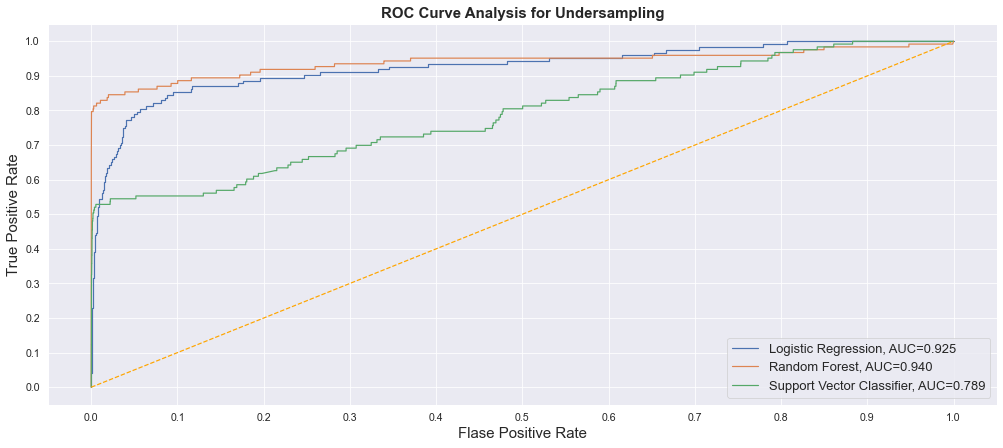

In [31]:
# Plot the ROC curve for undersampling
result_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(17,7))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis for Undersampling', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#### Learning Curve
Here we choose 4 models and try to see the trend of training and cross-validation scores over varrying training size. A cross-validation generator splits the whole dataset k times in training and test data. Subsets of the training set with varying sizes will be used to train the estimator and a score for each training subset size and the test set will be computed. Afterwards, the scores will be averaged over all k runs for each training subset size.

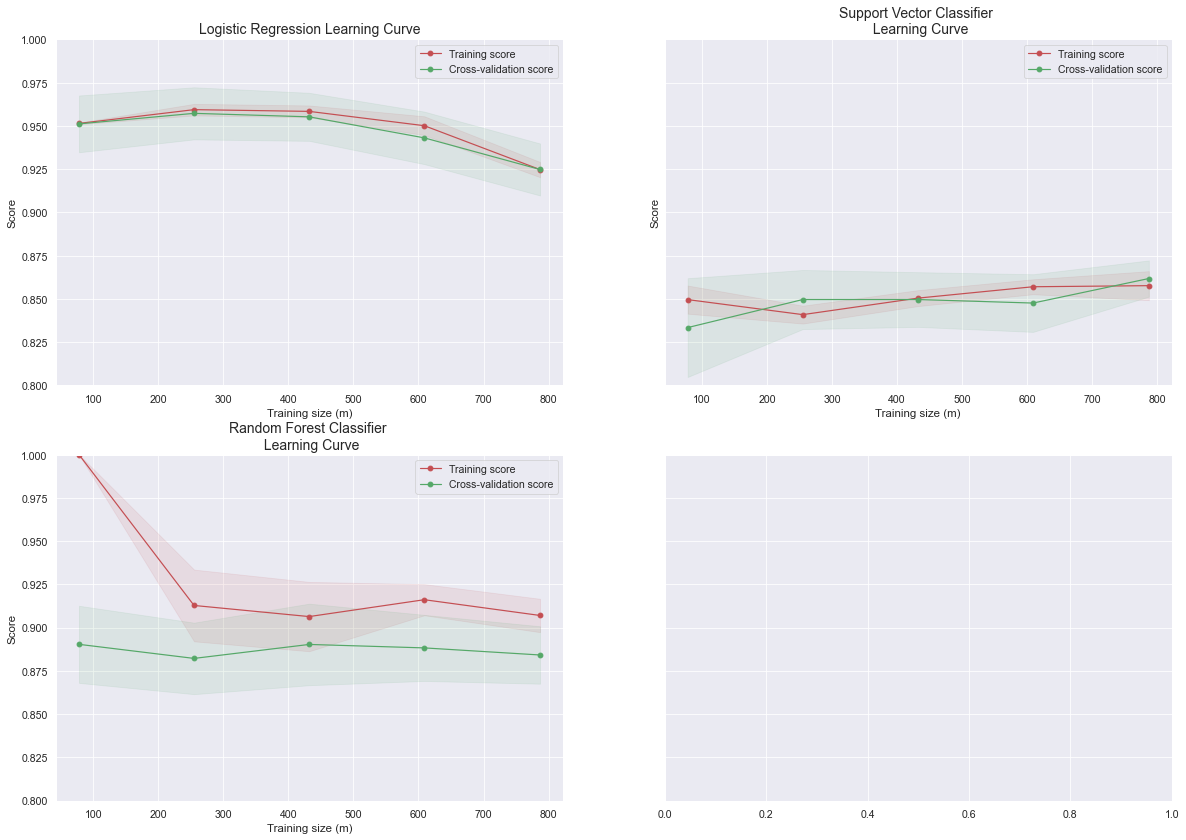

In [32]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3,X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = "recall")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
      
    # Second Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = "recall")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    ax2.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = "recall")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    ax3.set_title("Random Forest Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    return plt
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=333)



df = datafr.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=333)
y = new_df["Class"]
X = new_df.iloc[:,0:30]

plot_learning_curve(log_reg_us, svc, rfc, X, y, (0.8, 1));

## <a id='4'> Model Prediction </a>
### SMOTE
Synthetic Minority Over-sampling Technique has been designed to generate new samples that are coherent with the minor class distribution. The main idea is to consider the relationships that exist between samples and create new synthetic points along the segments connecting a group of neighbors. Below is the python code for implementing SMOTE.
![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png)

In [33]:
from imblearn.over_sampling import SMOTE

imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              LogisticRegression())

imba_pipeline.fit(X_train, y_train);

logistic_cv_score_os = cross_val_score(imba_pipeline, X_train, y_train, scoring = 'recall', cv = kf)


y_test_predict = imba_pipeline.named_steps['logisticregression'].predict(X_test)
logistic_recall_os = recall_score(y_test, y_test_predict)
logistic_accuracy_os = accuracy_score(y_test, y_test_predict)
logistic_f1_os = f1_score(y_test, y_test_predict)
logistic_precision_os = average_precision_score(y_test, y_test_predict)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

In [37]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              RandomForestClassifier())
#cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kf)

imba_pipeline.fit(X_train, y_train);

rf_cv_score_os = cross_val_score(imba_pipeline, X_train, y_train, scoring = 'recall', cv = kf)


y_test_predict = imba_pipeline.named_steps['randomforestclassifier'].predict(X_test)
rfc_recall_os = recall_score(y_test, y_test_predict)
rfc_accuracy_os = accuracy_score(y_test, y_test_predict)
rfc_f1_os = f1_score(y_test, y_test_predict)
rfc_precision_os = average_precision_score(y_test, y_test_predict)

In [38]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              SVC())
imba_pipeline.fit(X_train, y_train);

svc_cv_score_os = cross_val_score(imba_pipeline, X_train, y_train, scoring = 'recall', cv = kf)


y_test_predict = imba_pipeline.named_steps['svc'].predict(X_test)
svc_recall_os = recall_score(y_test, y_test_predict)
svc_accuracy_os = accuracy_score(y_test, y_test_predict)
svc_f1_os = f1_score(y_test, y_test_predict)
svc_precision_os = average_precision_score(y_test, y_test_predict)

In [39]:
# Gather the scores
final_scores = [['Logistic Regression', logistic_accuracy_us, logistic_accuracy_os, logistic_recall_us, logistic_recall_os, logistic_precision_us, logistic_f1_os, logistic_precision_us, logistic_precision_os], 
        ['Random Forest', rfc_accuracy_us, rfc_accuracy_os, rfc_recall_us, rfc_recall_os, rfc_f1_us, rfc_f1_os, rfc_precision_us, rfc_precision_os], 
        ['Support Vector', svc_accuracy_us, svc_accuracy_os, svc_recall_us, svc_recall_os, svc_f1_us, svc_f1_os, svc_precision_us, svc_precision_os ]] 
  
# Create the dataframe 
final_df = pd.DataFrame(final_scores, columns = ['Classifier', 'Accuracy - Random UnderSampling', 'Accuracy - Oversampling (SMOTE)',
                                                'Recall - Random UnderSampling', 'Recall - Oversampling (SMOTE)',
                                                'F1 Score - Random UnderSampling', 'F1 Score - Oversampling (SMOTE)',
                                                'Precision - Random UnderSampling', 'Precision - Oversampling (SMOTE)'
                                                ]) 
final_df

,Classifier,Accuracy - Random UnderSampling,Accuracy - Oversampling (SMOTE),Recall - Random UnderSampling,Recall - Oversampling (SMOTE),F1 Score - Random UnderSampling,F1 Score - Oversampling (SMOTE),Precision - Random UnderSampling,Precision - Oversampling (SMOTE)
0,Logistic Regression,0.827336,0.974762,0.878049,0.878049,0.007866,0.107303,0.007866,0.050385
1,Random Forest,0.502851,0.999438,0.951220,0.796748,0.006567,0.830508,0.003218,0.691336
2,Support Vector,0.725893,0.984284,0.666667,0.861789,0.008333,0.159279,0.003371,0.075859


# Conclusion
So far we tried using various performance metrics like Confusion matrix, F1-Score, Precision-Recall curve for different techniques like over-sampling of minority class, under-sampling of majority class and SMOTE (Synthetic Minority Over-Sampling Technique). Based on our evaluation metrics we found that undersampling Logistic Regression has better Accuracy, and Recall than other algorithms. However, Random Forest with SMOTE has greater Accuracy, Recall, F1 Score and Precision.<br>
If there's no restriction for computational limit then winner is **Random Forest with SMOTE** else we can try to use other model combination for under-sampling.
<br><br>
**Further Improvements: To further improve the model, below options can be considered:**
* Try using Deep Learning algorithms like CNN, or stacked or hybrid machine learning algorithms
* Try using variants of SMOTE.
* Tuning of hyper-parameters(learning rate, max-depth, etc.) of the above models.